In [1]:
import pandas as pd

In [2]:
J = "jaccard_score"
FP = "num_false_positives"
FN = "num_false_negatives"
PRECISION = "precision"
RECALL = "recall"
F1 = "f1_score"
COMPLEXITY = "len_shortest_explanation"
NUMERIC = [J, F1, PRECISION, RECALL, FP, FN, COMPLEXITY]

In [3]:
src_df=pd.read_csv("../data/results.tsv", sep="\t")

In [4]:
src_df.query("completed == False")

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
338,ABoxTask-76adb16b-8893-452e-a96f-4e2fa4e1d9e1-...,False,ABoxTask-76adb16b-8893-452e-a96f-4e2fa4e1d9e1,ABoxTask,chain_of_thought,gpt-3.5-turbo,NaN,[],\n\n\nI will provide an ontology as a list of ...,NaN,...,[],"['fhkb:James_Bright_1964', 'fhkb:Julie_Bright_...",0.0,2.0,0.0,NaN,0.0,0.0,0.0,1.0


## Filter empty... these should not exist TODO

In [5]:
# src_df.query("jaccard_score == 'None'")

In [6]:
invalid_rows = src_df[pd.to_numeric(src_df['jaccard_score'], errors='coerce').isna()]
invalid_rows

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
30,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'IndependentContinuant', 'explanatio...",\n\n\nI will provide an ontology as a list of ...,- IndependentContinuant\n- Continuant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'PolyatomicEntity', 'explanations': ...",\n\n\nI will provide an ontology as a list of ...,- PolyatomicEntity [ HeteroatomicMolecularEnt...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'IndependentContinuant', 'explanatio...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ IndependentContinuant is an ind...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'Root', 'explanations': None}, {'tex...",\n\n\nI will provide an ontology as a list of ...,- Root\n- OBI:0100026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'OBI:0100026', 'explanations': [{'ax...",\n\n\nI will provide an ontology as a list of ...,- OBI:0100026 [ Root SubClassOf OBI:0100026 ;...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'Root', 'explanations': [{'axioms': ...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ OBI:0100026 and Root are indire...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,basic,gpt-4,NaN,[{'text': 'There is no oio:Subset in the provi...,\n\n\nI will provide an ontology as a list of ...,There is no oio:Subset in the provided ontolog...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,explanation,gpt-4,NaN,"[{'text': 'There is no ""oio:Subset"" class ment...",\n\n\nI will provide an ontology as a list of ...,"There is no ""oio:Subset"" class mentioned in th...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-4,NaN,"[{'text': 'Unfortunately, there is no ""oio:Sub...",\n\n\nI will provide an ontology as a list of ...,"Unfortunately, there is no ""oio:Subset"" in the...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,basic,gpt-4,NaN,"[{'text': 'BiologicalProcess', 'explanations':...",\n\n\nI will provide an ontology as a list of ...,- BiologicalProcess\n- Occurrent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
invalid_rows.groupby(["model", "task_type"]).count()

,,name,completed,task_name,method,description,answers,prompt,completion,jaccard_score,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
model,task_type,,,,,,,,,,,,,,,,,,,
gpt-3.5-turbo,EntailedIndirectSuperClassTask,6,6,6,6,0,6,6,6,0,0,0,0,0,0,0,0,0,0,0
gpt-4,EntailedIndirectSuperClassTask,6,6,6,6,0,6,6,6,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df = src_df.query("jaccard_score != 'None'")

In [9]:
for c in NUMERIC:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [10]:
invalid_rows = df[pd.to_numeric(df['jaccard_score'], errors='coerce').isna()]
invalid_rows

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_positives,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
30,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'IndependentContinuant', 'explanatio...",\n\n\nI will provide an ontology as a list of ...,- IndependentContinuant\n- Continuant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'PolyatomicEntity', 'explanations': ...",\n\n\nI will provide an ontology as a list of ...,- PolyatomicEntity [ HeteroatomicMolecularEnt...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'IndependentContinuant', 'explanatio...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ IndependentContinuant is an ind...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'Root', 'explanations': None}, {'tex...",\n\n\nI will provide an ontology as a list of ...,- Root\n- OBI:0100026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'OBI:0100026', 'explanations': [{'ax...",\n\n\nI will provide an ontology as a list of ...,- OBI:0100026 [ Root SubClassOf OBI:0100026 ;...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'Root', 'explanations': [{'axioms': ...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ OBI:0100026 and Root are indire...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,basic,gpt-4,NaN,[{'text': 'There is no oio:Subset in the provi...,\n\n\nI will provide an ontology as a list of ...,There is no oio:Subset in the provided ontolog...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,explanation,gpt-4,NaN,"[{'text': 'There is no ""oio:Subset"" class ment...",\n\n\nI will provide an ontology as a list of ...,"There is no ""oio:Subset"" class mentioned in th...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,True,EntailedIndirectSuperClassTask-e7cddc7c-d026-4...,EntailedIndirectSuperClassTask,chain_of_thought,gpt-4,NaN,"[{'text': 'Unfortunately, there is no ""oio:Sub...",\n\n\nI will provide an ontology as a list of ...,"Unfortunately, there is no ""oio:Subset"" in the...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,EntailedIndirectSuperClassTask-123d8892-187d-4...,True,EntailedIndirectSuperClassTask-123d8892-187d-4...,EntailedIndirectSuperClassTask,basic,gpt-4,NaN,"[{'text': 'BiologicalProcess', 'explanations':...",\n\n\nI will provide an ontology as a list of ...,- BiologicalProcess\n- Occurrent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe()

,description,jaccard_score,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation
count,0.0,756.000000,756.000000,756.000000,756.000000,0.0,756.000000,756.000000,756.000000,756.000000
mean,NaN,0.484377,1.007937,1.392857,2.472222,NaN,0.580916,0.528073,0.532886,2.801587
std,NaN,0.422473,1.685133,2.250039,2.714791,NaN,0.451947,0.435552,0.426831,2.338347
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.500000,1.000000,1.000000,2.000000,NaN,0.833333,0.600000,0.666667,2.000000
75%,NaN,1.000000,1.000000,1.000000,4.000000,NaN,1.000000,1.000000,1.000000,4.000000
max,NaN,1.000000,15.000000,21.000000,17.000000,NaN,1.000000,1.000000,1.000000,11.000000


In [12]:
df[["task_type"]].drop_duplicates().style.hide()

task_type
EntailedIndirectSuperClassTask
EntailedTransitiveSuperClassTask
MostRecentCommonSubsumerTask
EntailedSubClassOfExpressionTask
OntologyCoherencyTask
ABoxTask


In [13]:
df['correct'] = df.apply(lambda row: row.num_false_positives + row.num_false_negatives == 0, axis=1)

In [14]:
GROUPS = ["task_type", "method", "model"]

In [15]:
df.groupby(GROUPS).count()

name   
task_type                        method           model                 
ABoxTask                         basic            gpt-3.5-turbo    29  \
                                                  gpt-4            29   
                                 chain_of_thought gpt-3.5-turbo    29   
                                                  gpt-4            29   
                                 explanation      gpt-3.5-turbo    29   
                                                  gpt-4            29   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo    19   
                                                  gpt-4            19   
                                 chain_of_thought gpt-3.5-turbo    19   
                                                  gpt-4            19   
                                 explanation      gpt-3.5-turbo    19   
                                                  gpt-4            19   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   
OntologyCoherencyTask            basic            gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 chain_of_thought gpt-3.5-turbo    20   
                                                  gpt-4            20   
                                 explanation      gpt-3.5-turbo    20   
                                                  gpt-4            20   

                                                                 completed   
task_type                        method           model                      
ABoxTask                         basic            gpt-3.5-turbo         29  \
                                                  gpt-4                 29   
                                 chain_of_thought gpt-3.5-turbo         29   
                                                  gpt-4                 29   
                                 explanation      gpt-3.5-turbo         29   
                                                  gpt-4                 29   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo         20   
                                                  gpt-4                 20   
                                 chain_of_thought gpt-3.5-turbo         20   
                                                  gpt-4                 20   
                                 explanation      gpt-3.5-turbo         20   
                                                  gpt-4                 20   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo         20   
                                                  gpt-4                 20   
                                 chain_of_

In [16]:
df.groupby(GROUPS).max(numeric_only=True)

completed   
task_type                        method           model                      
ABoxTask                         basic            gpt-3.5-turbo       True  \
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
OntologyCoherencyTask            basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   

                                                                 description   
task_type                        method           model                        
ABoxTask                         basic            gpt-3.5-turbo          NaN  \
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4     

In [17]:
df.groupby(GROUPS).min(numeric_only=True)

completed   
task_type                        method           model                      
ABoxTask                         basic            gpt-3.5-turbo       True  \
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo      False   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   
OntologyCoherencyTask            basic            gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 chain_of_thought gpt-3.5-turbo       True   
                                                  gpt-4               True   
                                 explanation      gpt-3.5-turbo       True   
                                                  gpt-4               True   

                                                                 description   
task_type                        method           model                        
ABoxTask                         basic            gpt-3.5-turbo          NaN  \
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4     

In [18]:
df.groupby(GROUPS).mean(numeric_only=True)

completed   
task_type                        method           model                      
ABoxTask                         basic            gpt-3.5-turbo   1.000000  \
                                                  gpt-4           1.000000   
                                 chain_of_thought gpt-3.5-turbo   0.965517   
                                                  gpt-4           1.000000   
                                 explanation      gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 chain_of_thought gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 explanation      gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 chain_of_thought gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 explanation      gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 chain_of_thought gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 explanation      gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 chain_of_thought gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 explanation      gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
OntologyCoherencyTask            basic            gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 chain_of_thought gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   
                                 explanation      gpt-3.5-turbo   1.000000   
                                                  gpt-4           1.000000   

                                                                 description   
task_type                        method           model                        
ABoxTask                         basic            gpt-3.5-turbo          NaN  \
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                                  gpt-4                  NaN   
                                 explanation      gpt-3.5-turbo          NaN   
                                                  gpt-4     

In [19]:
main_summary_table = df.groupby(GROUPS).mean(numeric_only=True).reset_index()
print(main_summary_table[ GROUPS + [F1]].to_markdown("main_summary_table.md", index=False))
main_summary_table[ GROUPS + [F1]]

None


,task_type,method,model,f1_score
0,ABoxTask,basic,gpt-3.5-turbo,0.642144
1,ABoxTask,basic,gpt-4,1.000000
2,ABoxTask,chain_of_thought,gpt-3.5-turbo,0.305337
3,ABoxTask,chain_of_thought,gpt-4,0.928736
4,ABoxTask,explanation,gpt-3.5-turbo,0.571429
5,ABoxTask,explanation,gpt-4,0.994253
6,EntailedIndirectSuperClassTask,basic,gpt-3.5-turbo,0.739145
7,EntailedIndirectSuperClassTask,basic,gpt-4,0.940078
8,EntailedIndirectSuperClassTask,chain_of_thought,gpt-3.5-turbo,0.587469
9,EntailedIndirectSuperClassTask,chain_of_thought,gpt-4,0.814255


In [31]:
cmap = {
   "ABoxTask": "abox",
    "EntailedIndirectSuperClassTask": "indirect",
    "EntailedSubClassOfExpressionTask": "expr",
    "EntailedTransitiveSuperClassTask": "superc",
    "MostRecentCommonSubsumerTask": "mrca",
    "OntologyCoherencyTask": "sat",
}

In [47]:
df["task"] = df.apply(lambda row: cmap[row["task_type"]], axis=1)
pv_pivot = df.pivot_table(index=["model", "method"], columns="task", values=F1)
pv_pivot.style.highlight_max(axis=0, props='font-weight:bold').format(precision=3)

In [43]:
pv_pivot.reset_index()
pv_pivot.reset_index()[["model", "method"] + list(cmap.values()) ].to_markdown("results.md", index=False)

## Correlation

In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

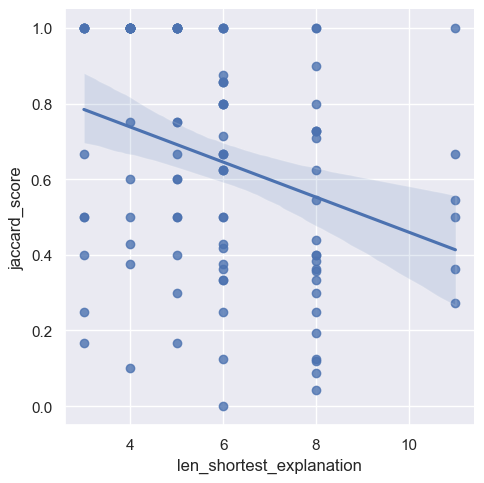

In [22]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=J, data=df.query("task_type == 'EntailedIndirectSuperClassTask'"))
plt.show()

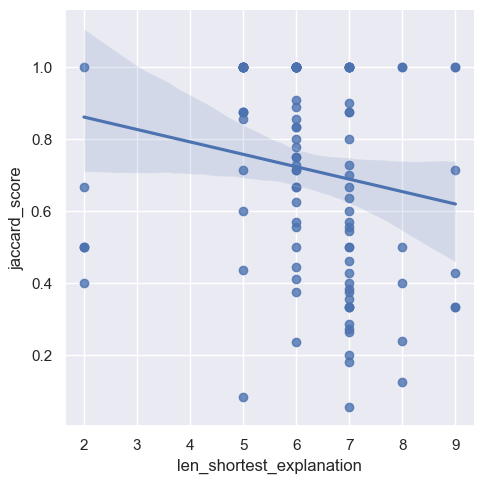

In [23]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=J, data=df.query("task_type == 'EntailedTransitiveSuperClassTask'"))
plt.show()

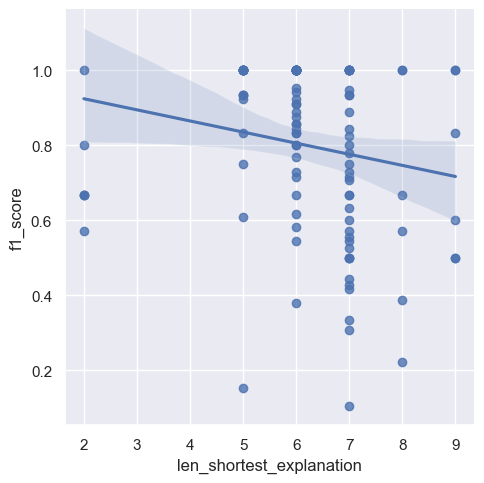

In [24]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df.query("task_type == 'EntailedTransitiveSuperClassTask'"))
plt.show()

## GPT-4 performance on transitivity task does not degrade with complexity

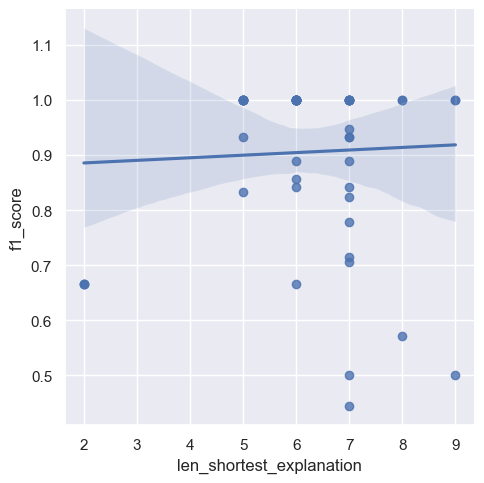

In [25]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-4'"))
plt.show()

Note: many of the dots are multiple data points with the same values; GPT-4 frequently gives the same results for the same task across all 3 methods

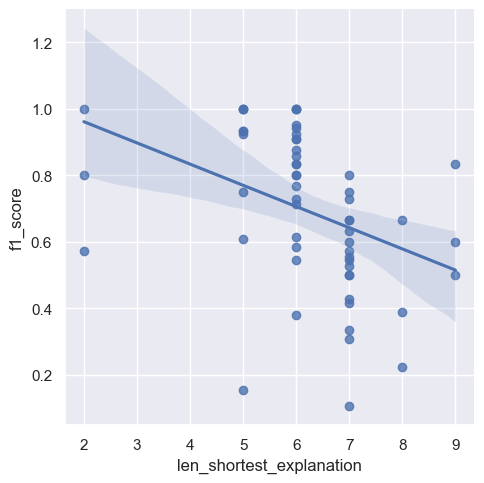

In [26]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x=COMPLEXITY, y=F1, data=df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-3.5-turbo'"))
plt.show()

<Axes: xlabel='len_shortest_explanation', ylabel='f1_score'>

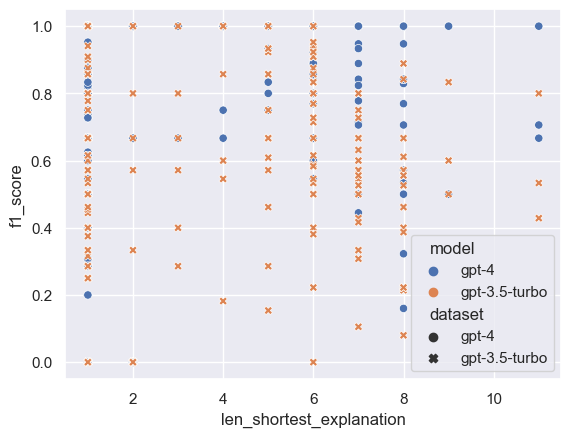

In [27]:
dftups = [(model, df.query(f"model=='{model}'")) for model in ["gpt-4", "gpt-3.5-turbo"]]
for m, mdf in dftups:
    mdf.assign(dataset=m)
concatenated = pd.concat([mdf.assign(dataset=m) for m, mdf in dftups])
sns.scatterplot(x=COMPLEXITY, y=F1, data=concatenated, style='dataset', hue='model')

In [28]:
df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-4' and len_shortest_explanation == 2")

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation,correct
498,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,basic,gpt-4,NaN,"[{'text': 'Process', 'explanations': None}, {'...",\n\n\nI will provide an ontology as a list of ...,- Process\n- Occurrent\n- IndependentContinuan...,...,[],2.0,0.0,2.0,NaN,0.5,1.0,0.666667,2.0,False
499,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,explanation,gpt-4,NaN,"[{'text': 'Process', 'explanations': [{'axioms...",\n\n\nI will provide an ontology as a list of ...,- Process [ MolecularFunction SubClassOf Proc...,...,[],2.0,0.0,2.0,NaN,0.5,1.0,0.666667,2.0,False
500,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,chain_of_thought,gpt-4,NaN,"[{'text': 'Occurrent', 'explanations': [{'axio...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ Occurrent is an entailed superc...,...,[],2.0,0.0,2.0,NaN,0.5,1.0,0.666667,2.0,False


In [29]:
df.query("task_type == 'EntailedTransitiveSuperClassTask' and model == 'gpt-3.5-turbo' and len_shortest_explanation == 2")

,name,completed,task_name,task_type,method,model,description,answers,prompt,completion,...,false_negatives,num_false_positives,num_false_negatives,num_true_positives,num_true_negatives,precision,recall,f1_score,len_shortest_explanation,correct
114,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,basic,gpt-3.5-turbo,NaN,"[{'text': 'Process', 'explanations': None}, {'...",\n\n\nI will provide an ontology as a list of ...,- Process \n- Occurrent \n- IndependentContinuant,...,[],1.0,0.0,2.0,NaN,0.666667,1.0,0.800000,2.0,False
115,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,explanation,gpt-3.5-turbo,NaN,"[{'text': 'Occurrent', 'explanations': [{'axio...",\n\n\nI will provide an ontology as a list of ...,- Occurrent [ MolecularFunction SubClassOf Pr...,...,[],0.0,0.0,2.0,NaN,1.000000,1.0,1.000000,2.0,True
116,EntailedTransitiveSuperClassTask-c256405a-455c...,True,EntailedTransitiveSuperClassTask-c256405a-455c...,EntailedTransitiveSuperClassTask,chain_of_thought,gpt-3.5-turbo,NaN,"[{'text': 'Process', 'explanations': [{'axioms...",\n\n\nI will provide an ontology as a list of ...,- REASONING: [ Process is an entailed supercla...,...,[],3.0,0.0,2.0,NaN,0.400000,1.0,0.571429,2.0,False


In [45]:
obf_df=pd.read_csv("../data/results-obf-20.tsv", sep="\t")

In [46]:
obf_df.groupby(GROUPS).mean(numeric_only=True)

completed   
task_type                        method           model                      
ABoxTask                         basic            gpt-3.5-turbo        0.0  \
                                 chain_of_thought gpt-3.5-turbo        0.0   
                                 explanation      gpt-3.5-turbo        0.0   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo        1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                 explanation      gpt-3.5-turbo        1.0   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo        1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                 explanation      gpt-3.5-turbo        1.0   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo        1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                 explanation      gpt-3.5-turbo        1.0   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo        1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                 explanation      gpt-3.5-turbo        1.0   
OntologyCoherencyTask            basic            gpt-3.5-turbo        1.0   
                                 chain_of_thought gpt-3.5-turbo        1.0   
                                 explanation      gpt-3.5-turbo        1.0   

                                                                 description   
task_type                        method           model                        
ABoxTask                         basic            gpt-3.5-turbo          NaN  \
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                 explanation      gpt-3.5-turbo          NaN   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo          NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                 explanation      gpt-3.5-turbo          NaN   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo          NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                 explanation      gpt-3.5-turbo          NaN   
EntailedTransitiveSuperClassTask basic            gpt-3.5-turbo          NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                 explanation      gpt-3.5-turbo          NaN   
MostRecentCommonSubsumerTask     basic            gpt-3.5-turbo          NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                 explanation      gpt-3.5-turbo          NaN   
OntologyCoherencyTask            basic            gpt-3.5-turbo          NaN   
                                 chain_of_thought gpt-3.5-turbo          NaN   
                                 explanation      gpt-3.5-turbo          NaN   

                                                                 jaccard_score   
task_type                        method           model                          
ABoxTask                         basic            gpt-3.5-turbo       0.000000  \
                                 chain_of_thought gpt-3.5-turbo       0.000000   
                                 explanation      gpt-3.5-turbo       0.000000   
EntailedIndirectSuperClassTask   basic            gpt-3.5-turbo       0.185472   
                                 chain_of_thought gpt-3.5-turbo       0.104163   
                                 explanation      gpt-3.5-turbo       0.135651   
EntailedSubClassOfExpressionTask basic            gpt-3.5-turbo       0.245833   
                                 chain_of_thought gpt-3.5-turbo       0.108333   
                                 explanation      gpt-3.5-turbo       0.160119   
E

In [48]:
obf_df["task"] = obf_df.apply(lambda row: cmap[row["task_type"]], axis=1)
pv_pivot = obf_df.pivot_table(index=["model", "method"], columns="task", values=F1)
pv_pivot.style.highlight_max(axis=0, props='font-weight:bold').format(precision=3)